In [1]:
import os;os.environ["TF_USE_LEGACY_KERAS"]="1"
import numpy as np                            # type: ignore
import tensorflow as tf                       # type: ignore
from tensorflow.keras import layers           # type: ignore

In [2]:
training_data = np.array([[0,0], [0,1], [1,0], [1,1]])
target_data   = np.array([  [0],   [1],   [1],   [0]])

<img src="model.png" alt="XOR model" width="500px" />

In [3]:
model = tf.keras.Sequential()
model.add(layers.Dense(4, input_dim=2, activation='sigmoid'))
model.add(layers.Dense(1, activation='sigmoid'))

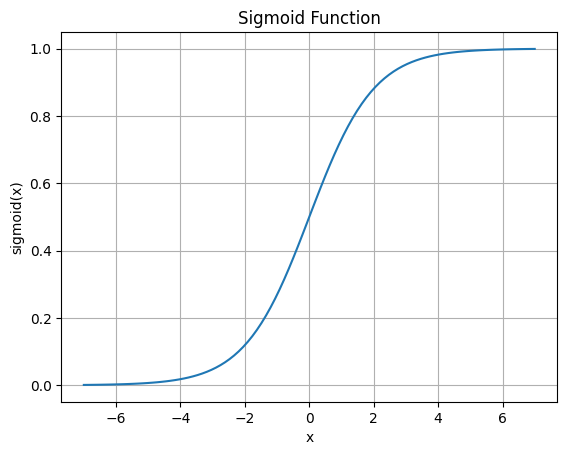

In [4]:
# sigmoid function
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# plot sigmoid function from -10 to 10
import matplotlib.pyplot as plt
x = np.linspace(-7, 7, 100)
plt.plot(x, sigmoid(x))
plt.xlabel('x')
plt.ylabel('sigmoid(x)')
plt.title('Sigmoid Function')
plt.grid()
plt.show()


In [5]:
model.compile(
  loss='binary_crossentropy',
  # Stochastic Gradient Descent
  optimizer=tf.keras.optimizers.SGD(learning_rate=1.0), 
  metrics=['accuracy'])

In [6]:
epochs = 700
model.fit(training_data, target_data, epochs=epochs)

Epoch 1/700
1/1 [==============================] - 19s 19s/step - loss: 0.8320 - accuracy: 0.5000
Epoch 2/700
1/1 [==============================] - 0s 6ms/step - loss: 0.7331 - accuracy: 0.5000
Epoch 3/700
1/1 [==============================] - 0s 6ms/step - loss: 0.7038 - accuracy: 0.5000
Epoch 4/700
1/1 [==============================] - 0s 6ms/step - loss: 0.6960 - accuracy: 0.5000
Epoch 5/700
1/1 [==============================] - 0s 6ms/step - loss: 0.6939 - accuracy: 0.2500
Epoch 6/700
1/1 [==============================] - 0s 6ms/step - loss: 0.6933 - accuracy: 0.2500
Epoch 7/700
1/1 [==============================] - 0s 7ms/step - loss: 0.6931 - accuracy: 0.5000
Epoch 8/700
1/1 [==============================] - 0s 6ms/step - loss: 0.6931 - accuracy: 0.5000
Epoch 9/700
1/1 [==============================] - 0s 6ms/step - loss: 0.6930 - accuracy: 0.5000
Epoch 10/700
1/1 [==============================] - 0s 6ms/step - loss: 0.6930 - accuracy: 0.5000
Epoch 11/700
1/1 [==========

In [7]:
model.predict(training_data)

1/1 [==============================] - 0s 300ms/step


array([[0.02604198],
       [0.9695868 ],
       [0.9735144 ],
       [0.03164509]], dtype=float32)

In [8]:
# schreibe eine Funktion, die die Gewichte und Biases als Arduino-Code ausgibt
# jeder Layer bekommt eine eigene Nummer
# die zweidimensionalen Gewichte werden beibehalten
def print_weights(layer, layer_number):
    weights = layer.get_weights()
    print("")
    print(f"// Layer {layer_number}")
    print(f"const float layer{layer_number}_weights[][{len(weights[0][0])}] = {{")
    for i in range(len(weights[0])):
        print("  {", end="")
        for j in range(len(weights[0][0])):
            print(f"{weights[0][i][j]:.6f}", end="")
            if j < len(weights[0][0])-1:
                print(", ", end="")
        print("},")
    print("};")

    print(f"const float layer{layer_number}_biases[] = {{")
    for i in range(len(weights[1])):
        print(f"  {weights[1][i]:.6f},")
    print("};")

layer_number = 1
for layer in model.layers:
  print_weights(layer, layer_number)
  layer_number += 1




// Layer 1
const float layer1_weights[][4] = {
  {-2.661358, -0.005710, 3.121311, -6.451425},
  {-2.090339, 1.522780, 3.211208, -6.401955},
};
const float layer1_biases[] = {
  3.708739,
  -0.341909,
  -4.902582,
  2.614123,
};

// Layer 2
const float layer2_weights[][1] = {
  {5.062288},
  {-1.523900},
  {-6.455785},
  {-10.212896},
};
const float layer2_biases[] = {
  1.633715,
};
